In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from sklearn import metrics

# Read in the CSV file
df = pd.read_excel('/content/Car details v3.xlsx')

# View the first few rows of the dataset
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm      5  
1       250N

In [59]:
df.describe()

,year,selling_price,km_driven,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,5.434271
std,3.897402,5.235504e+05,5.870328e+04,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [60]:
corr_matrix= df.corr()

In [61]:
corr_matrix

,year,selling_price,km_driven,seats
year,1.000000,0.427335,-0.387918,0.025021
selling_price,0.427335,1.000000,-0.161265,0.158531
km_driven,-0.387918,-0.161265,1.000000,0.207890
seats,0.025021,0.158531,0.207890,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6717 non-null   object
 1   year           6717 non-null   int64 
 2   selling_price  6717 non-null   int64 
 3   km_driven      6717 non-null   int64 
 4   fuel           6717 non-null   object
 5   seller_type    6717 non-null   object
 6   transmission   6717 non-null   object
 7   owner          6717 non-null   object
 8   mileage        6717 non-null   object
 9   engine         6717 non-null   object
 10  max_power      6717 non-null   object
 11  torque         6717 non-null   object
 12  seats          6717 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 682.3+ KB


In [63]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5


In [64]:
df = df.drop(['seller_type','transmission','owner','max_power','torque','seats'], axis=1)

In [65]:
df.head(2)

,name,year,selling_price,km_driven,fuel,mileage,engine
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,23.4 kmpl,1248 CC
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,21.14 kmpl,1498 CC


In [66]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
# df['Make_enc'] = encoder.fit_transform(df['Make',''])
columns = ['name', 'fuel','mileage','engine']
for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [67]:
df.head(2)

,name,year,selling_price,km_driven,fuel,mileage,engine
0,1249,2014,450000,145500,1,335,13
1,1546,2014,370000,120000,1,284,36


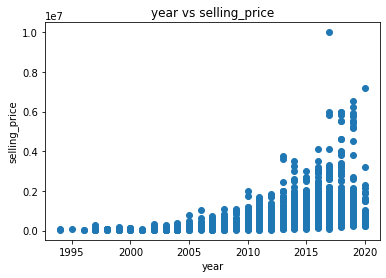

In [68]:
import matplotlib.pyplot as plt
plt.scatter(df['year'], df['selling_price'])
plt.title('year vs selling_price')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.show()

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [70]:
# Normalization function 
# def norm_func(i):
#     x = (i-i.min())/(i.max()-i.min())
#     return (x)

In [71]:
# Normalized data frame (considering the numerical part of data)
# df_norm = norm_func(df.iloc[:,:])

K Means Clustering


Using Elbow method to find optimum number of clusters

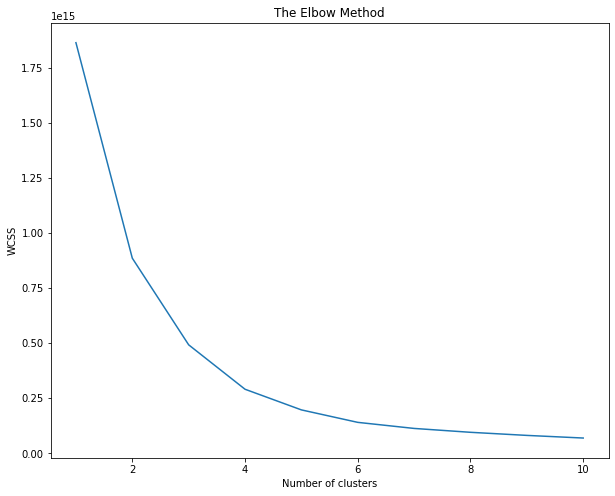

In [72]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the plot optimum Number of clusters are 5

To confirm the same,Lets use Silhouette score

In [73]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.5630479102076481
Silhouette score for k(clusters) = 4 is 0.5801349192960787
Silhouette score for k(clusters) = 5 is 0.5842308716115214
Silhouette score for k(clusters) = 6 is 0.507333393152845
Silhouette score for k(clusters) = 7 is 0.46536051939237816
Silhouette score for k(clusters) = 8 is 0.46748955010837795
Silhouette score for k(clusters) = 9 is 0.4696844342269069
Silhouette score for k(clusters) = 10 is 0.4628258186710846
Silhouette score for k(clusters) = 11 is 0.44120348936795506
Silhouette score for k(clusters) = 12 is 0.4237775625590467


As per the Silhouette score also,k=5 is the optimum number of clusters

In [74]:
# Set the number of clusters
k = 5

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [75]:
# Get the cluster labels
labels = kmeans.labels_


In [76]:
# Add the labels to the dataframe
df['cluster'] = labels


In [77]:
# View the first few rows of the clustered data
df.head()

,name,year,selling_price,km_driven,fuel,mileage,engine,cluster
0,1249,2014,450000,145500,1,335,13,3
1,1546,2014,370000,120000,1,284,36,3
2,375,2006,158000,140000,3,180,35,2
3,743,2010,225000,127000,1,327,24,3
4,1290,2007,130000,120000,3,136,14,2


In [78]:
# Group by cluster and calculate the mean of each column
grouped = df.groupby('cluster').mean()

In [79]:
# Print the grouped data
grouped

,name,year,selling_price,km_driven,fuel,mileage,engine
cluster,,,,,,,
0,1076.514667,2016.706667,2.019597e+06,46217.096000,1.160000,117.317333,74.520000
1,1021.640913,2012.686567,2.373656e+05,53583.132572,2.925373,269.621598,115.402107
2,1132.982628,2010.358761,4.181045e+05,123964.897281,1.267372,107.402568,62.648036
3,1022.249886,2014.823207,5.450027e+05,76718.564185,0.978986,309.551393,23.857012
4,865.143195,2014.525444,4.505592e+05,48868.386982,2.993491,201.162130,14.632544
